# Tasca M7 T01


En los próximos ejercicios, crearemos diversos modelos de clasificación. Sin embargo, antes de comenzar, como es habitual, primero descargaremos la base de datos, la convertiremos en un DataFrame, describiremos sus variables y verificaremos si no contiene valores nulos, NaN o duplicados.

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('data/wineData.txt', names= ['Cultivos', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',	'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'Optical density', 'Proline'])

df

,Cultivos,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Optical density,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivos              178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  Optical density       178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


**Diccionario de terminos:**

- **Cultivos**: Un valor numérico que representa el tipo de cultivo al que pertenece la uva de origen.
- **Alcohol**: La cantidad de alcohol presente en la muestra.
- **Malic** acid: La cantidad de ácido málico presente en una muestra, medido en gramos por litro.
- **Ash**: La cantidad de ceniza en la muestra, generalmente expresada en términos de contenido mineral o residuo mineral.
- **Alcalinity of ash**: La alcalinidad de la ceniza, que indica el nivel de alcalinidad o basicidad en términos químicos.
- **Magnesium**: La cantidad de magnesio en la muestra, medido en miligramos por litro.
- **Total phenols**: La cantidad total de fenoles presentes, expresada en miligramos por litro.
- **Flavanoids**: La cantidad de flavonoides presentes en la muestra, también medida miligramos por litro.
- **Nonflavanoid phenols**: La cantidad de fenoles no flavonoides presentes, expresada en miligramos por litro.
- **Proanthocyanins**: La cantidad de proantocianidinas presentes en la muestra, medida miligramos por litro.
- **Color intensity**: La intensidad del color de la muestra.
- **Hue**: La tonalidad o matiz del color de la muestra.
- **Optical density**: La densidad óptica de la muestra, que indica la cantidad de luz que absorbe en una medida específica.
- **Proline**: La cantidad de proline (un aminoácido) presente en la muestra, medido en miligramos por litro.

In [3]:
df.isnull().sum()

Cultivos                0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
Optical density         0
Proline                 0
dtype: int64

In [4]:
df.isna().sum()

Cultivos                0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
Optical density         0
Proline                 0
dtype: int64

In [5]:
df.duplicated().sum()

0

A continuación haremos un pequeño estudio estadistico de las variables y observaremos las correlaciones de estas.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cultivos,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


<Axes: >

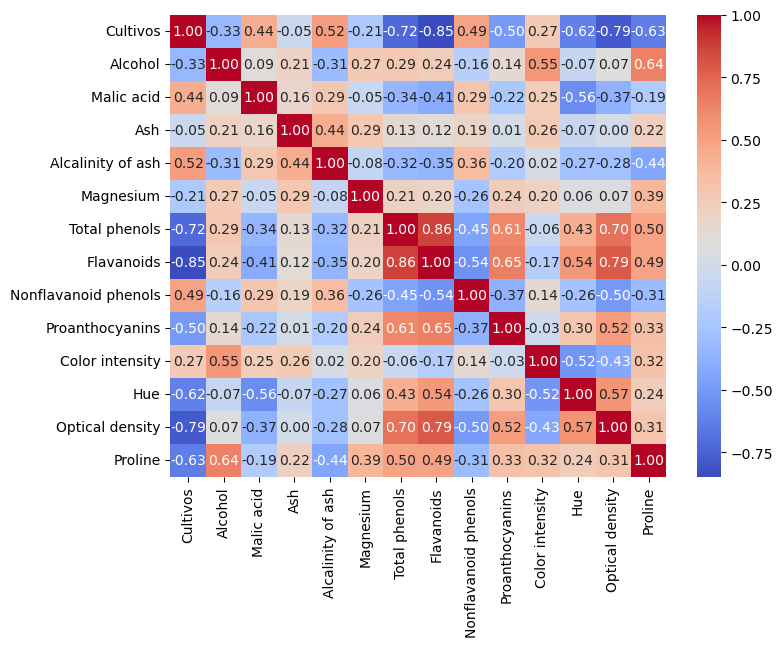

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap='coolwarm')

In [8]:
correlation_matrix = df.corr()

high_correlation_threshold = 0.7
high_correlation_vars = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_correlation_threshold:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            high_correlation_vars.append((var1, var2, correlation_matrix.iloc[i, j]))
high_correlation_vars_sorted = sorted(high_correlation_vars, key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in high_correlation_vars_sorted:
    print(f"{var1} y {var2} tienen una correlación de {corr:.2f}")


Flavanoids y Total phenols tienen una correlación de 0.86
Flavanoids y Cultivos tienen una correlación de -0.85
Optical density y Cultivos tienen una correlación de -0.79
Optical density y Flavanoids tienen una correlación de 0.79
Total phenols y Cultivos tienen una correlación de -0.72


Observamos que entre las cinco correlaciones más fuertes, tres están relacionadas con lo que posteriormente se convertirá en nuestra variable objetivo, 'Cultivos'. Esto sugiere la posibilidad de obtener buenos resultados en nuestro análisis. Sin embargo, también notamos una alta correlación entre estas tres variables predictoras ('Flavanoids', 'Total phenols' y 'Optical density') lo cual podría indicar la presencia de información redundante en el modelo, lo que complicaría la evaluación de la importancia individual de cada una. Esto, a su vez, podría hacer que el modelo sea menos estable en sus predicciones. Veremos como nos afecta esta colinealidad en el futuro.

Seguimos ahora con el estudio estadistico de las variables, en este caso gráficamente.

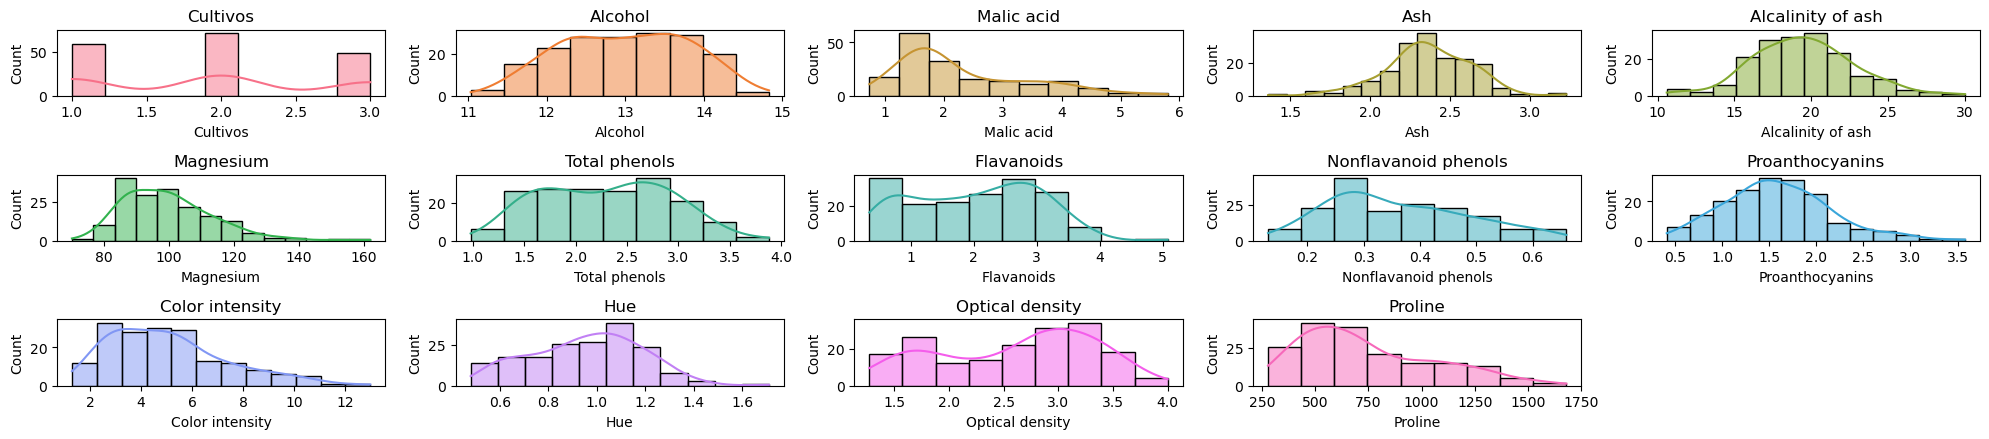

In [9]:
plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=14)

for i, column in enumerate(df.columns):
    plt.subplot(14, 5, i +1  )
    sns.histplot(data=df,x=df[column],kde=True,color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

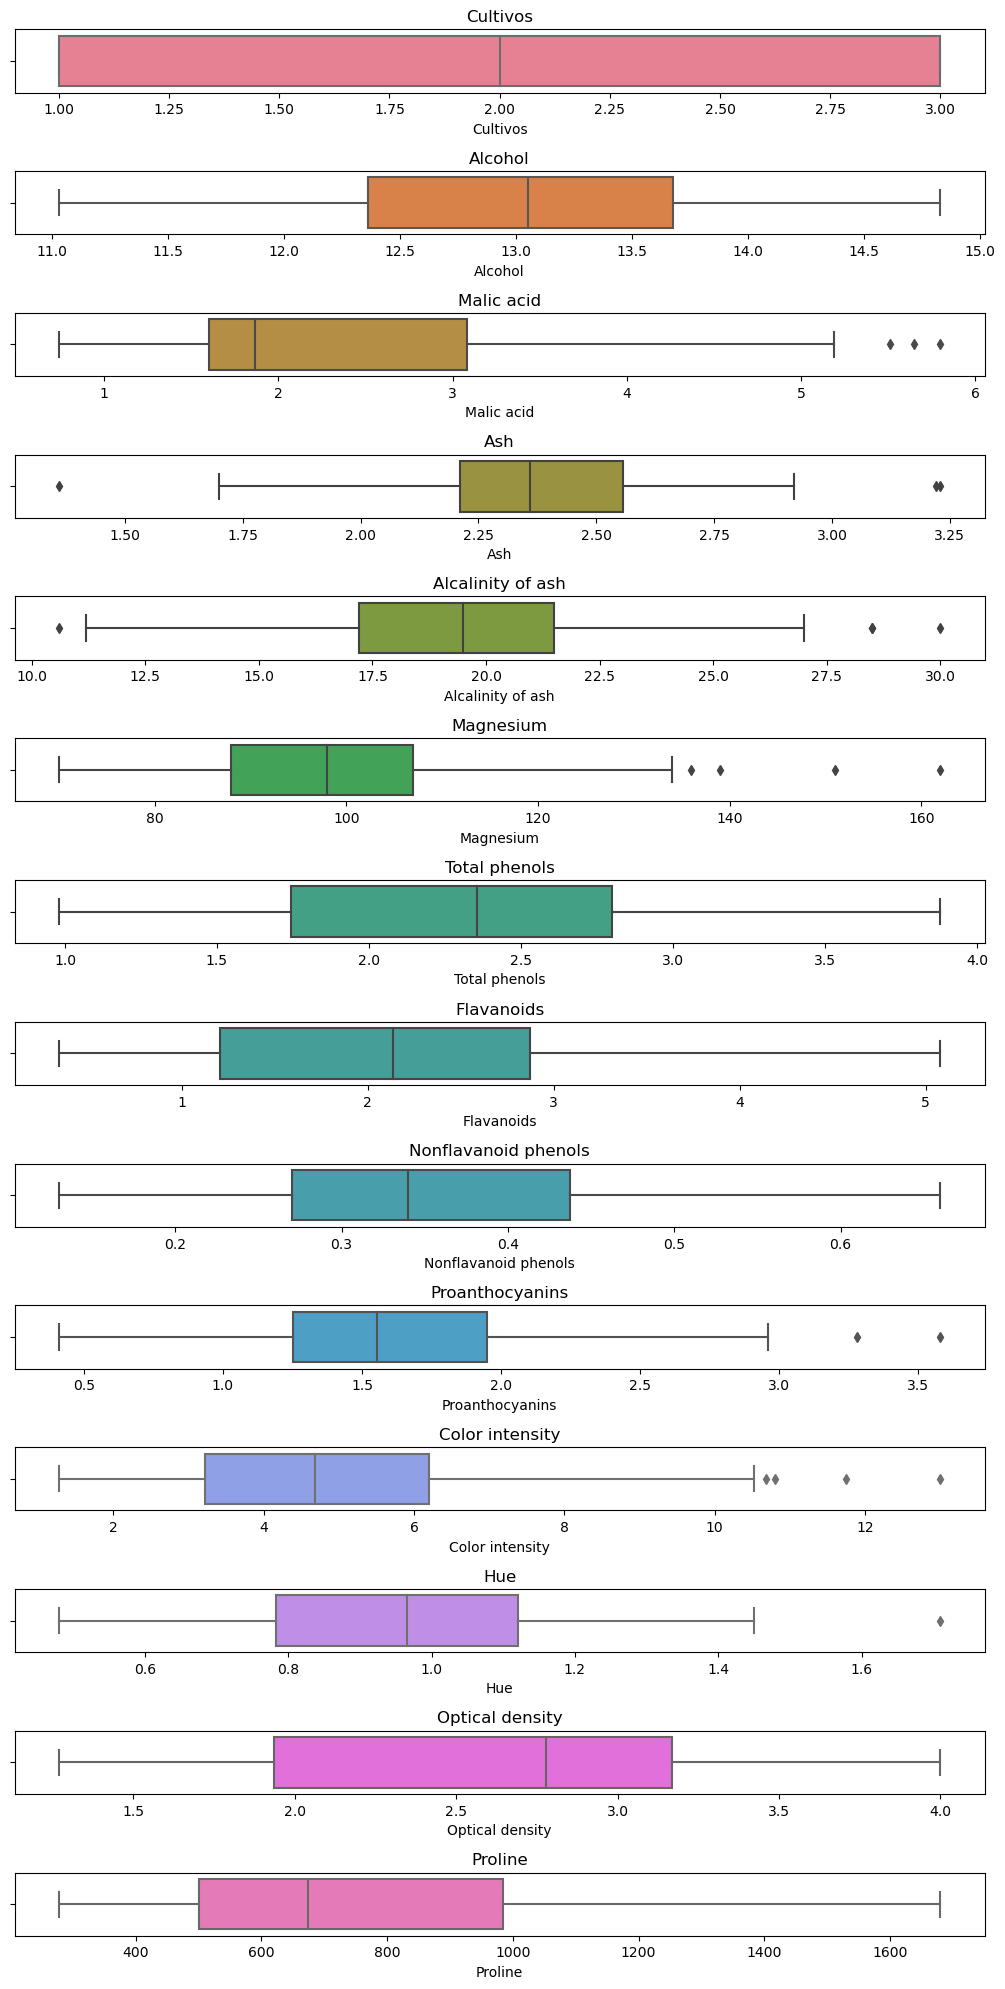

In [10]:
plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=14)

for i, column in enumerate(df.columns):
    plt.subplot(14, 2, 2*i + 1)
    sns.boxplot(x=df[column], orient="h",color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

Lo mas destacado es que:
- no encontramos valores absurdos en ninguna de las variables.
- la variable target no hay exactamente el mismo número de registros de cada clase (aunque siendo pequeña la diferencia no tendría porque repercutirnos en los resultados de los modelos de clasificación).
- vemos la existencia de outliers en algunas variables, 
- y por último, podemos intuir que alguna variable como 'ash' o 'alcalinity of ash' tengan una distribución normal.

A continuación estudiaremos mas profundamente estos dos últimos puntos.

In [11]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))  

Column Cultivos outliers = 0.00%
Column Alcohol outliers = 0.00%
Column Malic acid outliers = 1.69%
Column Ash outliers = 1.69%
Column Alcalinity of ash outliers = 2.25%
Column Magnesium outliers = 2.25%
Column Total phenols outliers = 0.00%
Column Flavanoids outliers = 0.00%
Column Nonflavanoid phenols outliers = 0.00%
Column Proanthocyanins outliers = 1.12%
Column Color intensity outliers = 2.25%
Column Hue outliers = 0.56%
Column Optical density outliers = 0.00%
Column Proline outliers = 0.00%


In [12]:
from scipy import stats
from scipy.stats import shapiro

for data in df.columns:
    shapiro_test = stats.shapiro(df[data])
    print("La variable", data, "te un P-value de", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("La muestra tiene probablemente una distribución normal.\n")
    else:
        print("La muestra \033[91mNO\033[0m tiene probablemente una distribució normal.\n")

La variable Cultivos te un P-value de 3.526998097335039e-14
La muestra NO tiene probablemente una distribució normal.

La variable Alcohol te un P-value de 0.020050711929798126
La muestra NO tiene probablemente una distribució normal.

La variable Malic acid te un P-value de 2.94582247484243e-10
La muestra NO tiene probablemente una distribució normal.

La variable Ash te un P-value de 0.038691021502017975
La muestra NO tiene probablemente una distribució normal.

La variable Alcalinity of ash te un P-value de 0.26394858956336975
La muestra tiene probablemente una distribución normal.

La variable Magnesium te un P-value de 6.345416068143095e-07
La muestra NO tiene probablemente una distribució normal.

La variable Total phenols te un P-value de 0.0043947165831923485
La muestra NO tiene probablemente una distribució normal.

La variable Flavanoids te un P-value de 1.6790636436780915e-05
La muestra NO tiene probablemente una distribució normal.

La variable Nonflavanoid phenols te un P-

Unas vez tenemos todo el estudio estadístico hecho vamos a comenzar por el ejercicio 5 en el que nos pide aplicar un preprocesado de los datos con tal de obtener unos mejores resultados en los modelos de clasificación que trabajaremos.

## Exercici 5
**Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)**

Vamos a iniciar un proceso de estandarización de las variables, lo que implica ajustar todas las variables de modo que tengan la misma escala y relevancia en nuestro modelo, independientemente de sus valores iniciales. Para lograr esto, emplearemos tres enfoques distintos:

- StandardScaler: Este método es adecuado para variables con una distribución normal.
- MinMaxScaler: Lo usaremos en el caso de variables que no siguen una distribución normal y no contienen valores atípicos.
- RobustScaler: En el caso de variables que no siguen una distribución normal pero presentan valores atípicos, este método será el indicado.

Además de la estandarización, aplicaremos LabelEncoder, una herramienta valiosa en el preprocesamiento de datos cuando la variable objetivo es categórica y debe convertirse en valores numéricos. En este caso, aunque ya teníamos valores numéricos, necesitamos ajustarla para que las clases de los registros comiencen desde 0, como requiere XGBoost. En lugar de simplemente restar 1 de los valores de "Cultivos," optamos por utilizar esta técnica, que probablemente nos sea útil en futuros estudios.

Una vez finalizado, realizaremos unas descripción estadistica para ver los resultados.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Cultivos'] = label_encoder.fit_transform(df['Cultivos'])

scaler = StandardScaler()
df['Alcalinity of ash'] = scaler.fit_transform(df['Alcalinity of ash'].values.reshape(-1, 1))

variables_minmax = ['Alcohol', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']
minmax_scaler = MinMaxScaler()
df[variables_minmax] = minmax_scaler.fit_transform(df[variables_minmax])

variables_robust = ['Malic acid', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Optical density', 'Proline']

robust_scaler = RobustScaler()
df[variables_robust] = robust_scaler.fit_transform(df[variables_robust])

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cultivos,178.0,9.382022e-01,0.775035,0.000000,0.000000,1.000000e+00,2.000000,2.000000
Alcohol,178.0,5.185837e-01,0.213639,0.000000,0.350658,5.315789e-01,0.696711,1.000000
Malic acid,178.0,3.184786e-01,0.754828,-0.760135,-0.177365,-7.502679e-17,0.822635,2.658784
Ash,178.0,5.382443e-01,0.146708,0.000000,0.454545,5.347594e-01,0.640374,1.000000
Alcalinity of ash,178.0,-3.991813e-17,1.002821,-2.671018,-0.689137,1.518295e-03,0.602088,3.154511
Magnesium,178.0,3.232780e-01,0.155244,0.000000,0.195652,3.043478e-01,0.402174,1.000000
Total phenols,178.0,-5.663134e-02,0.591821,-1.300236,-0.579196,0.000000e+00,0.420804,1.442080
Flavanoids,178.0,-6.331158e-02,0.598119,-1.074850,-0.556886,1.327063e-16,0.443114,1.763473
Nonflavanoid phenols,178.0,1.304712e-01,0.743005,-1.253731,-0.417910,0.000000e+00,0.582090,1.910448
Proanthocyanins,178.0,3.725233e-01,0.180555,0.000000,0.264984,3.611987e-01,0.485804,1.000000


## Exercici 1
**Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.**
## Exercici 2
**Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.**

En este apartado haremos los dos ejercicios juntos, tanto crear los modelos como comparar los resultados entre ellos.

Para comenzar, vamos a dividir el dataframe en distintos conjuntos de entrenamiento. Nuestra variable objetivo es 'Cultivos', y el propósito es predecir a qué tipo de cultivo pertenece un vino basándonos en las variables predictoras. 

Después de esta división, crearemos gráficos para visualizar cómo se distribuyen las clases en la variable objetivo. Esto nos permitirá determinar si la distribución de clases es equitativa, lo que es importante para evitar posibles complicaciones en etapas posteriores del análisis.

In [15]:
X = df.drop('Cultivos', axis=1)  # Características
y = df['Cultivos']  # Etiquetas de clase
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

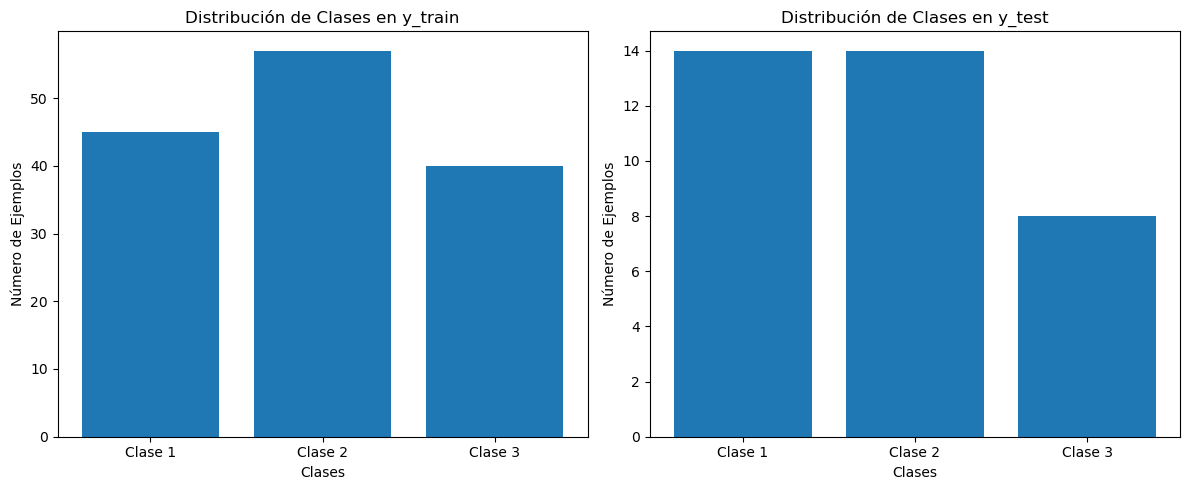

In [16]:
import matplotlib.pyplot as plt
import numpy as np

unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)
class_labels = ['Clase 1', 'Clase 2', 'Clase 3']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.bar(class_labels, counts_train)
plt.title('Distribución de Clases en y_train')
plt.xlabel('Clases')
plt.ylabel('Número de Ejemplos')

plt.subplot(122)
plt.bar(class_labels, counts_test)
plt.title('Distribución de Clases en y_test')
plt.xlabel('Clases')
plt.ylabel('Número de Ejemplos')

plt.tight_layout()
plt.show()

El reparto a simple vista parece no ser muy proporcionado, veremos como afecto esto en los resultados.

Los modelos de clasificación que he elegido han sido:
- **K-Nearest Neighbors (KNN)**: Este algoritmo clasifica un punto de datos en función de la mayoría de los votos de sus vecinos más cercanos, lo que puede ser efectivo en problemas donde la estructura de los datos se asemeja a agrupamientos o vecindarios. KNN es robusto y no hace suposiciones fuertes sobre la distribución de los datos, lo que lo hace adecuado para una amplia variedad de conjuntos de datos.
- **Regresión Logística**: Funciona al transformar una combinación lineal de características en una probabilidad mediante una función logística. Luego, utiliza esta probabilidad para asignar una instancia a una de las dos clases en un problema de clasificación binaria o a una de múltiples clases en un problema de clasificación multiclase. Es un modelo sólido y eficiente que se utiliza en una amplia gama de aplicaciones de clasificación y es especialmente útil cuando se requiere explicabilidad en los resultados.
- **XGBoost**: es una elección poderosa cuando se busca un alto rendimiento y precisión en problemas de clasificación. Es un algoritmo de conjunto (ensemble) que combina múltiples modelos de árboles de decisión para mejorar la precisión de las predicciones. XGBoost es conocido por su capacidad para manejar conjuntos de datos grandes y complejos, así como por su eficiencia en cuanto a velocidad de entrenamiento y predicción.

Model: KNN
Accuracy: 0.92
Precision: 0.93
Recall: 0.92
F1 Score: 0.92


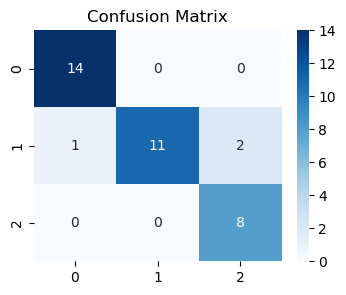



Model: Logistic Regression
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


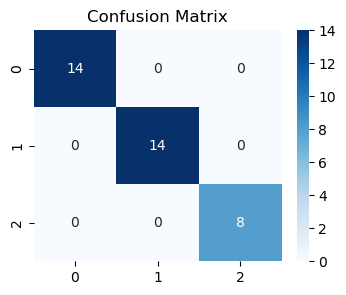



Model: XGBoost
Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1 Score: 0.94


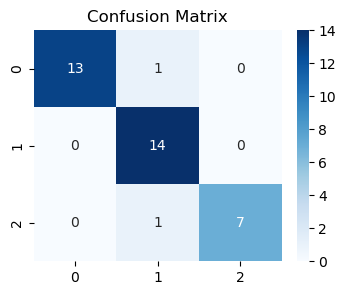

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

knn = KNeighborsClassifier()
logistic_reg = LogisticRegression()
xgb_model = xgb.XGBClassifier()

models = {'KNN': knn, 'Logistic Regression': logistic_reg, 'XGBoost': xgb_model}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
    print("\n")

Hemos evaluado la efectividad de cada modelo utilizando cuatro métricas clave:

- **Accuracy** (Exactitud), que mide la proporción de predicciones correctas en general.
- **Precisión**, que evalúa la proporción de predicciones positivas del modelo que son verdaderamente correctas.
- **Recall** (Sensibilidad), que mide la capacidad del modelo para identificar y capturar todos los ejemplos positivos.
- **F1 Score**, que combina precisión y recall para encontrar un equilibrio entre la minimización de los falsos positivos y los falsos negativos.


Los resultados muestran un rendimiento sobresaliente. En el caso de la regresión logística, ha sido impecable, sin errores en sus predicciones. Mientras tanto en KNN, hubo tres falsos negativos en la clase 1, y en XGBoost, se produjeron dos falsos positivos.

## Exercici 3
**Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.**

Para llevar a cabo este ejercicio, comenzamos creando dos diccionarios: uno para los modelos y otro para los parámetros. Luego, utilizamos la función GridSearchCV para buscar los mejores conjuntos de parámetros para cada modelo. A continuación, presentamos las métricas para comparar los modelos.

Modelo: KNN
Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Mejores estimadores: KNeighborsClassifier(metric='manhattan', n_neighbors=3)
Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1 Score: 0.94


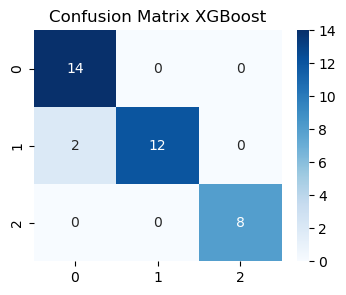



Modelo: Logistic Regression
Mejores parámetros: {'C': 1}
Mejores estimadores: LogisticRegression(C=1)
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


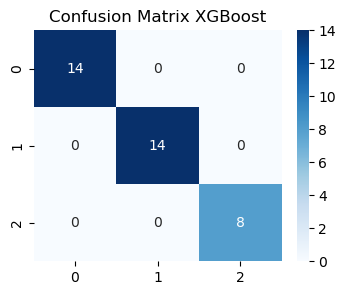



Modelo: XGBoost
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mejores estimadores: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


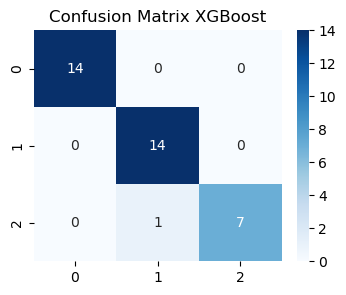

In [19]:
from sklearn.model_selection import GridSearchCV

modelos = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier(),
}

parametros = {
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan'],
    },
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
    },
}

for nombre_modelo, modelo in modelos.items():
    grid_search = GridSearchCV(modelo, parametros[nombre_modelo], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
    mejor_modelo = grid_search.best_estimator_

    mejor_modelo.fit(X_train, y_train)
    y_pred = mejor_modelo.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)

    print(f"Modelo: {nombre_modelo}")
    print(f"Mejores parámetros: {best_params}")
    print(f"Mejores estimadores: {mejor_modelo}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix {name}")
    plt.show()
    print("\n")

Durante la búsqueda de los mejores parámetros, parece que solo logramos mejoras marginales, ya sea porque era complicado aumentar el rendimiento o posiblemente debido a una elección subóptima de las variables.

- En el caso de KNN, observamos una mejora en el rendimiento, con ahora 2 errores en las predicciones, lo que resultó en mejoras ligeras en sus métricas.

- La regresión logística, por su parte, ya era un modelo perfecto y no experimentó cambios.

- En cuanto a XGBoost, como mencionamos en la descripción del modelo, es una herramienta poderosa al combinar varios árboles de regresión, lo que resulta en una amplia gama de parámetros a ajustar. Mientras que en otros modelos, solo hay uno o dos mejores estimadores, en XGBoost hay infinidad de ellos. A pesar de esto, logramos mejorar el rendimiento, obteniendo solo un error en las predicciones. En resumen, podemos concluir que XGBoost es una herramienta potente, pero para aprovecharla al máximo, es necesario profundizar en la optimización de sus numerosos parámetros.

## Exercici 4
**Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.**

Después de haber obtenido los mejores parámetros para cada modelo en el ejercicio anterior, procederemos a utilizarlos en una validación cruzada con tal de compararlos con los obtenidos en el conjunto de entrenamiento/prueba y evaluar así la calidad de nuestros modelos.

In [21]:
modelos_cv = {
    'KNN': {
        'modelo': KNeighborsClassifier(),
        'hiperparametros': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
    },
    'Logistic Regression': {
        'modelo': LogisticRegression(),
        'hiperparametros': {'C': 1}
    },
    'XGBoost': {
        'modelo': xgb.XGBClassifier(),
        'hiperparametros': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
    }
}

In [22]:
from sklearn.model_selection import cross_val_predict, cross_val_score

for nombre_modelo, info_modelo in modelos_cv.items():
    modelo = info_modelo['modelo']
    hiperparametros = info_modelo['hiperparametros']
    
    # Realiza la validación cruzada y guarda los puntajes en una variable
    accuracy = cross_val_score(modelo, X, y, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(modelo, X, y, scoring='precision_macro').mean()
    recall = cross_val_score(modelo, X, y, cv=5, scoring='recall_macro').mean()
    f1 = cross_val_score(modelo, X, y, cv=5, scoring='f1_macro').mean()
     
    print(f"Modelo: {nombre_modelo}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")

Modelo: KNN
Accuracy: 0.90
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


Modelo: Logistic Regression
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


Modelo: XGBoost
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95




Observamos que los resultados han disminuido ligeramente, lo que sugiere que los modelos no eran completamente precisos. Esto podría deberse a:
- una cantidad insuficiente de datos. 
- una distribución desigual, tanto en la cantidad de clases en el conjunto de datos inicial como en la distribución entre los conjuntos 'y_train' e 'y_test'.
- la colinealidad entre las variables. 

En cualquier caso, con resultados tan sólidos, podemos concluir que las predicciones de los modelos se deben más a su capacidad de aprendizaje que a su habilidad de "memorización". Es importante destacar que, en este conjunto de datos, la **regresión logística** se destacó, alcanzando un rendimiento casi perfecto.